In [70]:
##read this in conjuction w/ the read_me_steps.txt file which outlines a few of the steps our group intends to take

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [71]:
##STEP 1 READ DATA IN & CHANGE COLUMN NAMES TO REAL NAMES
data_dict = {
    'P(IPO)':'offer_price',
    'P(H)': 'price_range_higher_bound',
    'P(L)': 'price_range_lower_bound',
    'P(1Day)':'first_day_trading_price',
    'C1':'days',
    'C2':'top_tier_dummy',
    'C3':'earnings_per_share',
    'C4':'prior_nasdaq_15day_returns',
    'C5':'outstanding_shares',
    'C6':'offering_shares',
    'C7':'sales',
    'T1':'number_of_sentences',
    'T2':'number_of_words',
    'T3':'number_of_real_words',
    'T4':'number_of_long_sentences',
    'T5':'number_of_long_words',
    'S1':'number_of_positive_words',
    'S2':'number_of_negative_words',
    'S3':'number_of_uncertain_words',
    'Y1':'pre_ipo_price_revision',
    'Y2':'post_ipo_initial_return',
    'C3':'positive_eps_dummy',
    'C5':'share_overhang',
    'C6':'up_revision',
    'I1':'ticker',
    'I2':'company_name',
    'I3':'industry_classifier'
    
}

df = pd.read_excel('Competition1_raw_data.xlsx')
df.rename(columns=data_dict,inplace=True)

#sketchy column values and not super valuable w/ 200+ categories anyway
df = df.drop('industry_classifier',1)
df.head()

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [72]:
#JUST MAKING SURE THIS WORKS THE WAY I THINK IT WORKS
print(df.replace('-',np.nan).isna().sum().sales == len(df[df['sales']=='-']))
median = df.copy()
mean = df.copy()
#PRINT NUMBER OF MISSING VALUES IN EACH COLUMN
df.replace('-',np.nan).isna().sum()

True


ticker                         0
company_name                   0
offer_price                    5
price_range_higher_bound      10
price_range_lower_bound       10
first_day_trading_price       22
days                          22
top_tier_dummy                22
positive_eps_dummy            36
prior_nasdaq_15day_returns    22
share_overhang                 6
up_revision                    6
sales                         72
number_of_sentences            1
number_of_words                1
number_of_real_words           1
number_of_long_sentences       1
number_of_long_words           1
number_of_positive_words       1
number_of_negative_words       1
number_of_uncertain_words      1
dtype: int64

In [73]:
#STEP 2, IMPUTE MISSING DATA
placeholder = df.replace('-',np.nan).isna().sum().reset_index().rename(columns={'index':'columns1',0:'nulls'})
needs_replacement = placeholder[placeholder['nulls']>0].columns1.unique()

mean_value_dict = {}

for i in needs_replacement:
    new_df = mean[mean['{}'.format(i)]!='-']
    med = new_df['{}'.format(i)].mean()
    mean_value_dict.update({i:med})

for i in needs_replacement:
    mean['{}'.format(i)] = mean['{}'.format(i)].replace('-',mean_value_dict['{}'.format(i)])

mean.replace('-',np.nan).isna().sum()
mean_value_dict

{'days': 149.72878787878787,
 'first_day_trading_price': 25.93476614935861,
 'number_of_long_sentences': 294.3538913362702,
 'number_of_long_words': 679.2202643171806,
 'number_of_negative_words': 120.1042584434655,
 'number_of_positive_words': 68.42143906020559,
 'number_of_real_words': 11395.844346549193,
 'number_of_sentences': 465.63436123348015,
 'number_of_uncertain_words': 144.75917767988253,
 'number_of_words': 12758.606461086638,
 'offer_price': 13.837666174298375,
 'positive_eps_dummy': 1.7889040247678045,
 'price_range_higher_bound': 15.481190476190477,
 'price_range_lower_bound': 13.515044642857143,
 'prior_nasdaq_15day_returns': 0.007282201411438542,
 'sales': 500.45996229508165,
 'share_overhang': 49357759.34467456,
 'top_tier_dummy': 0.8590909090909091,
 'up_revision': 12415194.229289941}

In [74]:
#STEP 2, IMPUTE MISSING DATA
placeholder = df.replace('-',np.nan).isna().sum().reset_index().rename(columns={'index':'columns1',0:'nulls'})
needs_replacement = placeholder[placeholder['nulls']>0].columns1.unique()

median_value_dict = {}

for i in needs_replacement:
    new_df = median[median['{}'.format(i)]!='-']
    med = new_df['{}'.format(i)].median()
    median_value_dict.update({i:med})
    
median_value_dict

for i in needs_replacement:
    median['{}'.format(i)] = median['{}'.format(i)].replace('-',median_value_dict['{}'.format(i)])

median.replace('-',np.nan).isna().sum()
median_value_dict

{'days': 107.0,
 'first_day_trading_price': 14.8450002670288,
 'number_of_long_sentences': 279.0,
 'number_of_long_words': 624.0,
 'number_of_negative_words': 100.0,
 'number_of_positive_words': 60.0,
 'number_of_real_words': 10785.0,
 'number_of_sentences': 444.0,
 'number_of_uncertain_words': 134.0,
 'number_of_words': 12045.0,
 'offer_price': 13.5,
 'positive_eps_dummy': 0.01,
 'price_range_higher_bound': 15.0,
 'price_range_lower_bound': 13.0,
 'prior_nasdaq_15day_returns': 0.009124591224158932,
 'sales': 103.833,
 'share_overhang': 27400178.0,
 'top_tier_dummy': 1.0,
 'up_revision': 7398703.5}

In [75]:
def calculate_Y1(mid,high,low):
    cut_off_point = (high + low) / 2
    if mid < cut_off_point:
        return 1
    else:
        return 0 
    
def calculate_Y2(offer_price, close_price):
    if offer_price < close_price:
        return 1
    else:
        return 0
    
mean['pre_IPO_price_revision'] = [calculate_Y1(mid,high,low) for mid,high,low in zip(mean['offer_price'],mean['price_range_higher_bound'],mean['price_range_lower_bound'])]    
median['pre_IPO_price_revision'] = [calculate_Y1(mid,high,low) for mid,high,low in zip(median['offer_price'],median['price_range_higher_bound'],median['price_range_lower_bound'])]

mean['post_IPO_initial_return'] = [calculate_Y2(offer_price,close_price) for offer_price, close_price in zip(mean['offer_price'],mean['first_day_trading_price'])]    
median['post_IPO_initial_return'] = [calculate_Y2(offer_price,close_price) for offer_price, close_price in zip(median['offer_price'],median['first_day_trading_price'])]


#median.to_csv('median_no_z_score.csv')
#mean.to_csv('mean_no_z_score.csv')

In [76]:
def calculate_outliers(value,q1,q3,iqr):
    if value > q3 + 1.5*iqr:
        global upper_count
        upper_count = upper_count + 1
        return q3
    elif value < q1 - 1.5*iqr:
        global lower_count
        lower_count = lower_count + 1
        return q1
    else:
        return value
    

In [77]:
for col in z_score_columns:
    upper_count = 0
    lower_count = 0
    q1 = median[col].quantile(.25)
    q3 = median[col].quantile(.75)
    iqr = q3-q1
    median[col] = [calculate_outliers(value,q1,q3,iqr) for value, q1, q3, iqr in zip(median[col], [q1 for i in range(0,len(median))], [q3 for i in range(0,len(median))], [iqr for i in range(0,len(median))])]    
    print('median ' + col + ' ' + str(upper_count) + ' upper outliers replaced')
    print('median ' + col + ' ' + str(lower_count) + ' lower outliers replaced')
    print(' ')
    
for col in z_score_columns:
    upper_count = 0 
    lower_count = 0
    q1 = mean[col].quantile(.25)
    q3 = mean[col].quantile(.75)
    iqr = q3-q1
    mean[col] = [calculate_outliers(value,q1,q3,iqr) for value, q1, q3, iqr in zip(mean[col],[q1 for i in range(0,len(mean))],[q3 for i in range(0,len(mean))],[iqr for i in range(0,len(mean))])]
    print('mean ' + col + ' ' + str(upper_count) + ' upper outliers replaced')
    print('mean ' + col + ' ' + str(lower_count) + ' lower outliers replaced')
    print(' ')

median offer_price 14 upper outliers replaced
median offer_price 0 lower outliers replaced
 
median price_range_higher_bound 28 upper outliers replaced
median price_range_higher_bound 15 lower outliers replaced
 
median price_range_lower_bound 27 upper outliers replaced
median price_range_lower_bound 6 lower outliers replaced
 
median first_day_trading_price 59 upper outliers replaced
median first_day_trading_price 0 lower outliers replaced
 
median days 69 upper outliers replaced
median days 0 lower outliers replaced
 
median positive_eps_dummy 41 upper outliers replaced
median positive_eps_dummy 84 lower outliers replaced
 
median prior_nasdaq_15day_returns 0 upper outliers replaced
median prior_nasdaq_15day_returns 9 lower outliers replaced
 
median share_overhang 53 upper outliers replaced
median share_overhang 0 lower outliers replaced
 
median up_revision 72 upper outliers replaced
median up_revision 0 lower outliers replaced
 
median sales 89 upper outliers replaced
median sales

In [78]:
median.to_csv('median_no_outliers.csv')
mean.to_csv('mean_no_outliers.csv')

In [79]:
from scipy.stats import skew

for col in z_score_columns:
    print(col + ' ' + str(skew(median[col])))
    
#skew(median.offer_price)
#median.hist()
#plt.show()

offer_price 0.06039858262790416
price_range_higher_bound -0.08925514480913105
price_range_lower_bound -0.07552738399604172
first_day_trading_price 0.19858482771795977
days 0.4836970895714529
positive_eps_dummy -0.2691040246777231
prior_nasdaq_15day_returns -0.13981468661917879
share_overhang 1.0008123629815167
up_revision 0.8162649558131012
sales 1.212434053221013
number_of_sentences 0.2952575883472776
number_of_words 0.3331722336388886
number_of_real_words 0.31508455331783725
number_of_long_sentences 0.3673822472122944
number_of_long_words 0.4203704208847791
number_of_positive_words 0.467278778122756
number_of_negative_words 0.5199203289945921
number_of_uncertain_words 0.35011147636825024
pre_IPO_price_revision -0.05280431839639706
post_IPO_initial_return -0.8927883047485055


In [80]:
#OUTLIERS.
#use IQR to handle outliers if you haven't normalized
#1.5 * lower IQR or Higher IQR to get outliers

#then we need to skewness handling to get every column normalized.

#then impute the data. figure out which columns to use mean and median based on the histogram or the skewness function
#then scale the columns

#one hot encode any categorical variables
#also add the industry category and encode. or bin continous variables. do binning after feature_selection. only bin useful shit 
#not all missing data is nan, '-',


#OUTLIERS
#NORMALIZE FIRST
#CALCULATE Z-SCORE
#REPLACE OUTLIERS
#IMPUTE DATA figure out which columns to use mean and median based on the histogram. use skew function to detect skewness
#SCALE COLUMNS
#ONE HOT ENCODE

#use z-score if and only if you handled skewness (normalization)
#for categorical values impute w/ mode. for the rest impute w/ mean 


#undersampling / oversampling in  order to balance 0's and 1's. If it's not crazy unbalanced do undersampling (cut off extra data to even it out)
#1.5 as many 1's as 0's. If it's further unbalanced 3x 4x do over sampling. 

In [81]:
mean.head()

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.60,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8.0,10.0,8.0,7.250000,152.75,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,7.0,14.0,12.0,6.700000,90.00,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16.0,14.0,12.390000,209.00,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21.0,21.0,19.0,21.030001,80.00,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,1


In [82]:
#Check Skewness and normalize variables in Mean DataFrame
import scipy.stats

for col in range(2,21):
    if abs(scipy.stats.skew(mean.iloc[:,col]))<=.5:
        #print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Symmetrical')
        pass
    elif scipy.stats.skew(mean.iloc[:,col])<(-.5) and scipy.stats.skew(mean.iloc[:,col]) >=(-1):
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Moderately Negatively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])>.5 and scipy.stats.skew(mean.iloc[:,col]) <1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Moderately Positively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])<-1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Highly Negatively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])>1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Highly Positively Skewed')

##No need to normalize dummy variable
print(' ')
#Apply cube root to share_overhang to normalize
print(scipy.stats.skew(np.cbrt(mean['share_overhang'])))
mean['share_overhang'] = np.cbrt(mean['share_overhang'])

#Apply Square root to up_revision to normalize
print(scipy.stats.skew(np.sqrt(mean['up_revision'])))
mean['up_revision'] = np.sqrt(mean['up_revision'])

#Apply cube root to sales to normalize
print(scipy.stats.skew(np.cbrt(mean['sales'])))
mean['sales'] = np.cbrt(mean['sales'])

#Apply Square root to number_of_negative_words to normalize
print(scipy.stats.skew(np.sqrt(mean['number_of_negative_words'])))
mean['number_of_negative_words'] = np.sqrt(mean['number_of_negative_words'])


top_tier_dummy -2.098290225275937  - Highly Negatively Skewed
share_overhang 0.9697129693431528  - Moderately Positively Skewed
up_revision 0.7971451051563555  - Moderately Positively Skewed
sales 1.0813539634476048  - Highly Positively Skewed
number_of_negative_words 0.5179597306591368  - Moderately Positively Skewed
 
0.18208840658889006
0.13389114380195302
-0.04286409180931812
0.029055337844225645


In [83]:

import scipy.stats

for col in range(2,21):
    if abs(scipy.stats.skew(median.iloc[:,col]))<=.5:
        #print(mean.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Symmetrical')
        pass
    elif scipy.stats.skew(median.iloc[:,col])<(-.5) and scipy.stats.skew(median.iloc[:,col]) >=(-1):
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Moderately Negatively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])>.5 and scipy.stats.skew(median.iloc[:,col]) <1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Moderately Positively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])<-1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Highly Negatively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])>1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Highly Positively Skewed')

##No need to normalize dummy variable
print(' ')
#Apply cube root to share_overhang to normalize
print(scipy.stats.skew(np.cbrt(median['share_overhang'])))

#Apply cube root to up_revision to normalize
print(scipy.stats.skew(np.cbrt(median['up_revision'])))

#Apply cube root to sales to normalize
print(scipy.stats.skew(np.cbrt(median['sales'])))

#Apply Square root to number_of_negative_words to normalize
print(scipy.stats.skew(np.sqrt(median['number_of_negative_words'])))


mean.head()

top_tier_dummy -2.1192517713040706  - Highly Negatively Skewed
share_overhang 1.0008123629815167  - Highly Positively Skewed
up_revision 0.8162649558131012  - Moderately Positively Skewed
sales 1.212434053221013  - Highly Positively Skewed
number_of_negative_words 0.5199203289945921  - Moderately Positively Skewed
 
0.20518707217294313
-0.1311859863266954
-0.17131036229408955
0.03086460117977873


,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.60,0.029074,344.715307,3255.764119,3.716773,470.0,12719.0,11560.0,301.0,690.0,62.0,10.816654,139.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8.0,10.0,8.0,7.250000,152.75,0.0,-1.62,-0.013352,306.769065,1549.193338,2.960063,791.0,21792.0,19585.0,510.0,1120.0,71.0,15.556349,237.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,7.0,14.0,12.0,6.700000,90.00,1.0,-1.24,0.020715,256.347692,2236.067977,1.946762,201.0,5262.0,4785.0,128.0,325.0,61.0,5.744563,60.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16.0,14.0,12.390000,209.00,1.0,-0.91,0.020023,245.788861,2121.320344,2.042906,328.0,8259.0,7574.0,177.0,509.0,80.0,7.681146,110.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21.0,21.0,19.0,21.030001,80.00,1.0,0.07,-0.034895,313.263192,2872.281323,8.583029,572.0,14830.0,13176.0,336.0,720.0,67.0,12.206556,167.0,0,1


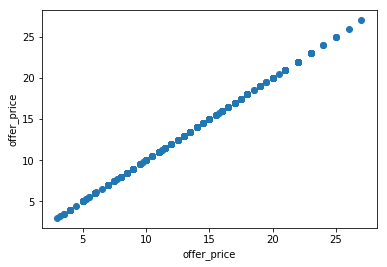

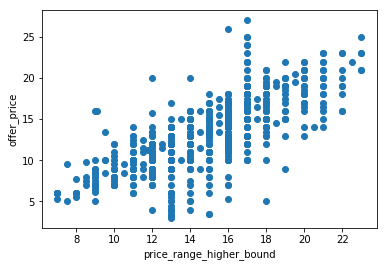

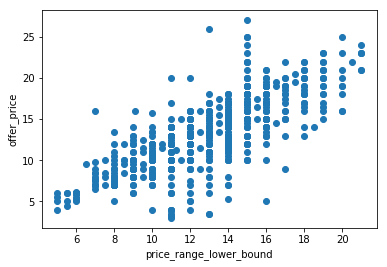

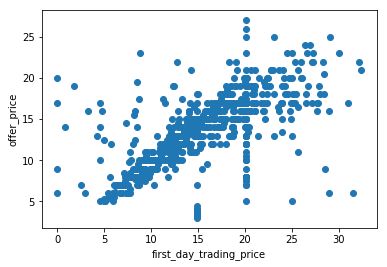

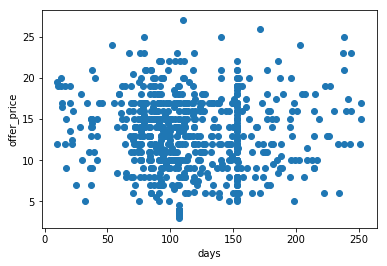

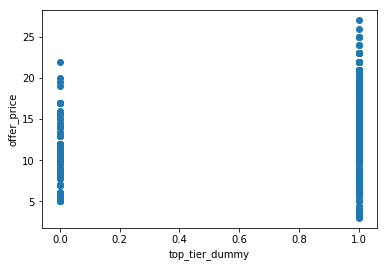

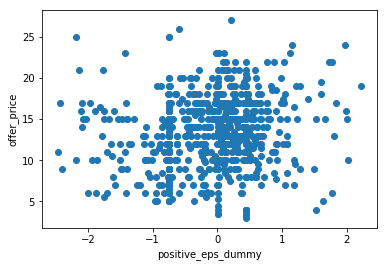

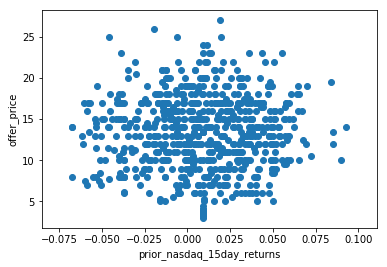

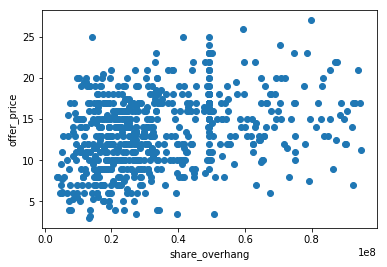

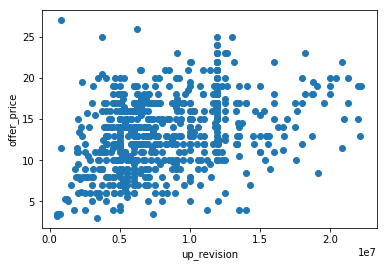

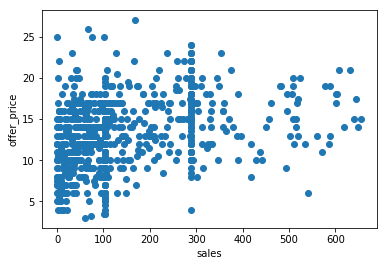

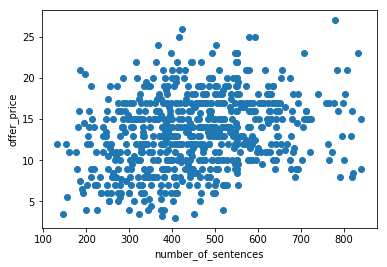

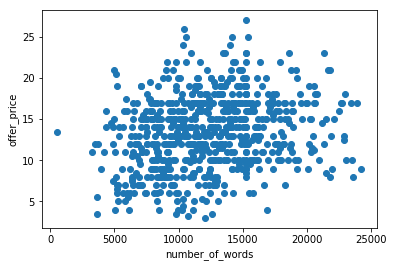

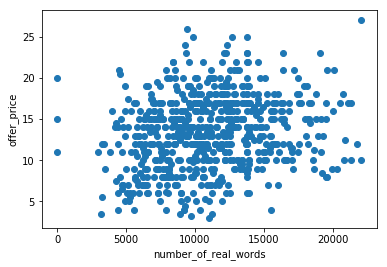

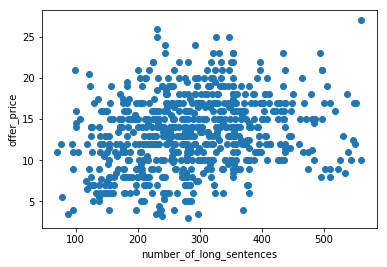

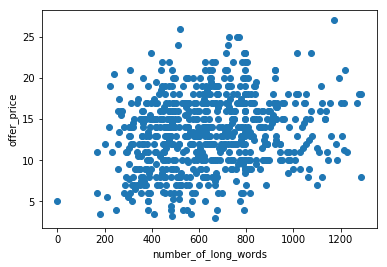

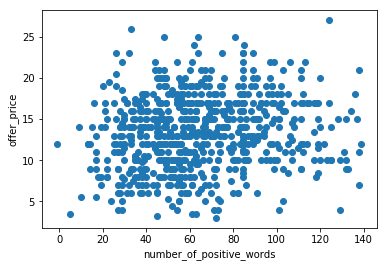

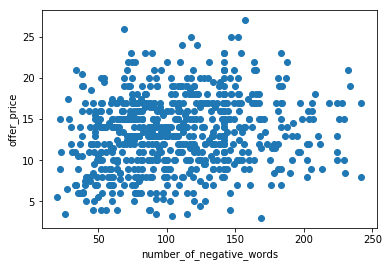

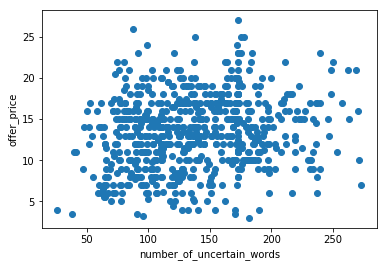

In [84]:
#STEP 3 EDA - CHECK OUT SCATTER PLOTS
import matplotlib.pyplot as plt

continous_columns = df.drop(['ticker','company_name'],1).columns

for i in continous_columns:
    plt.scatter(median['{}'.format(i)],median['offer_price'])
    plt.xlabel('{}'.format(i))
    plt.ylabel('offer_price')
    plt.show()
    

In [85]:
#GET THE COLUMNS THAT WE WANT TO NORMALIZE (ALL CONTINOUS COLUMNS EXCEPT FOR TICKER / COMPANY NAME)
z_score_columns = mean.drop(['ticker','company_name','top_tier_dummy','pre_IPO_price_revision','post_IPO_initial_return'],1).columns

#REPLACE EACH COLUMN IN THE MEAN PIPELINE W/ THE CORRESPONDING Z SCORE FOR THAT VALUE. hold off on this
for col in z_score_columns:
    mean[col] = (mean[col]-mean[col].mean())/mean[col].std(ddof=0)

#REPLACE EACH COLUMN IN THE MEDIAN PIPELINE W/ THE CORRESPONDING Z SCORE FOR THAT VALUE
for col in z_score_columns:
    median[col] = (median[col]-median[col].mean())/median[col].std(ddof=0)
    

In [86]:
median.to_csv('check_this_median_z.csv')
mean.to_csv('check_this_mean_z.csv')

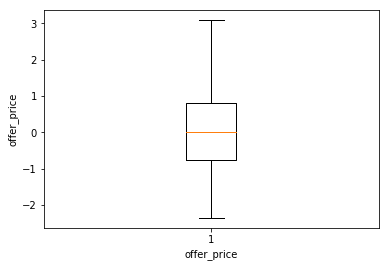

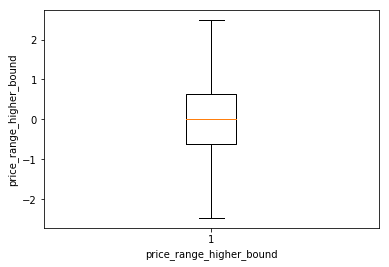

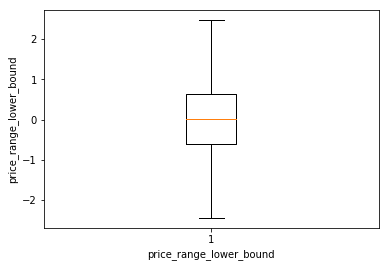

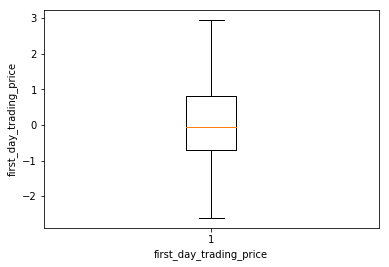

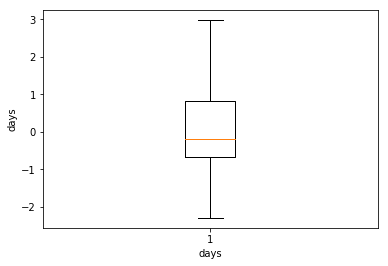

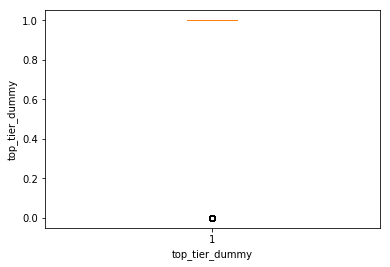

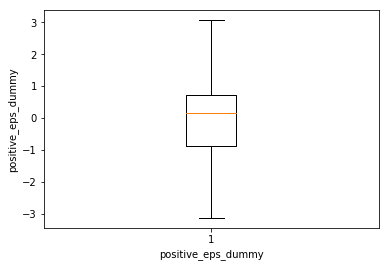

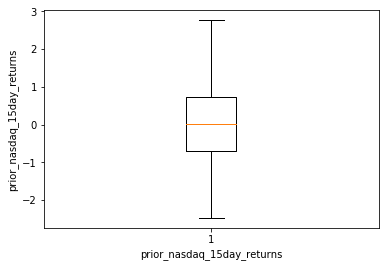

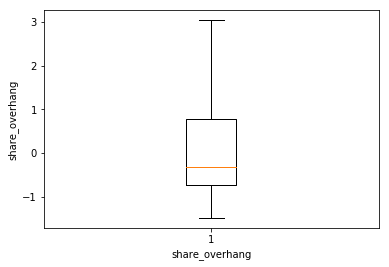

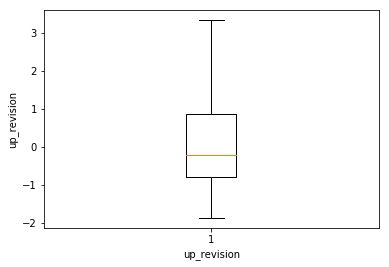

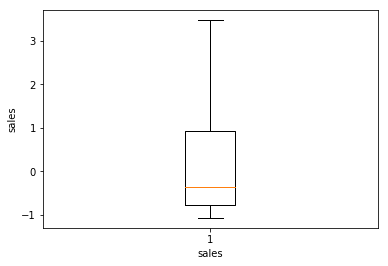

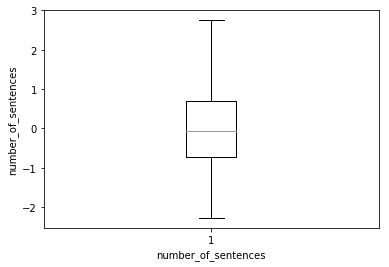

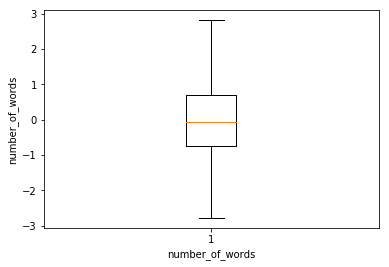

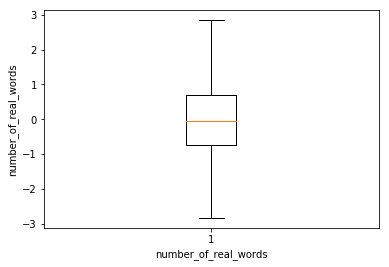

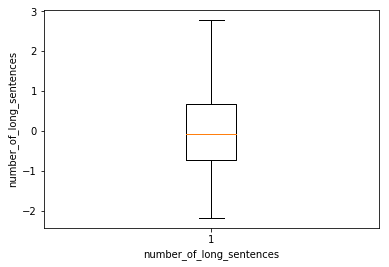

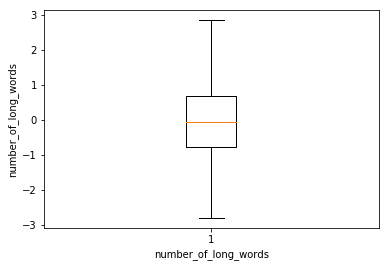

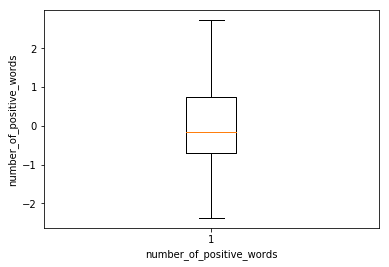

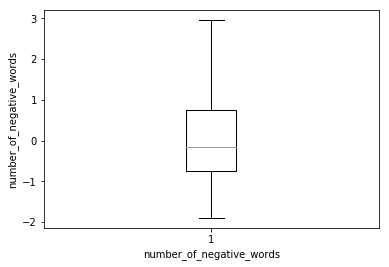

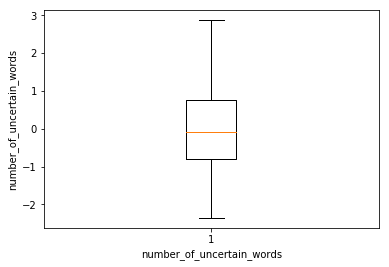

In [87]:
#STEP 3 EDA - CHECK OUT BOX PLOTS

#WHY ARE THESE DISTRIBUTIONS SO WEIRD. TOO MANY OUTLIERS FOR ME TO THINK THEY ARE REAL? INVESTIGATE FURTHER. 
#MAYBE THIS WILL BE BETTER W/ STANDARDIZATION/NORMALIZATION? IDEALLY DON'T WANT TO THROW OUT THAT MANY VALUES
for i in continous_columns:
    plt.boxplot(median['{}'.format(i)])
    plt.ylabel('{}'.format(i))
    plt.xlabel('{}'.format(i))
    plt.show()

In [88]:
#STEP 3 EDA - CORRELATIONS. WHICH OF THESE VARIABLES CAN WE REMOVE?
df.corr()

""


In [89]:
#STEP 4 STANDARDIZE/NORMALIZE
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

###STANDARDIZATION EXAMPLE 1. USE THIS FOR ALL THE COLUMNS DOWN THE ROAD
fake = df 
#fake.replace({'-',0 or median})
fake.first_day_trading_price.sort_values()

pd.Series(min_max_scaler.fit_transform(np.array(fake['first_day_trading_price']).reshape(-1,1)).reshape(1,682)[0]).hist()
import matplotlib.pyplot as plt 
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
###HOW TO NORMALIZE DATAPOINTS W/O GENERATING RANDOM NEW DATA
###ALSO WHY WOULD WE EVEN WANT TO LOSE THE DISTRIBUTION OF THE DATAPOINTS...
###NOT CONVINCED NORMALIZING MAKES SENSE HERE...DISCUSS W/ JTAO